<a href="https://colab.research.google.com/github/rohitfattepur/Tensorflow/blob/master/SO_Home.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unwanted Code

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [0]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

In [0]:
torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)

In [0]:
from tqdm import tqdm
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    pbar = tqdm(train_loader)
    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        pbar.set_description(desc= f'loss={loss.item()} batch_id={batch_idx}')


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [0]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

#for epoch in range(19, 21):
train(model, device, train_loader, optimizer, epoch = 20)
test(model, device, test_loader)

In [0]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
print("Tensorflow Version:",tf.__version__)
  
model = MobileNetV2(input_shape=[128, 128, 3], include_top=False) #or whatever model

print("Weights of the Layer",model.trainable_weights)

Tensorflow Version: 1.15.0
Weights of the Layer [<tf.Variable 'Conv1_1/kernel:0' shape=(3, 3, 3, 32) dtype=float32>, <tf.Variable 'bn_Conv1_1/gamma:0' shape=(32,) dtype=float32>, <tf.Variable 'bn_Conv1_1/beta:0' shape=(32,) dtype=float32>, <tf.Variable 'expanded_conv_depthwise_1/depthwise_kernel:0' shape=(3, 3, 32, 1) dtype=float32>, <tf.Variable 'expanded_conv_depthwise_BN_1/gamma:0' shape=(32,) dtype=float32>, <tf.Variable 'expanded_conv_depthwise_BN_1/beta:0' shape=(32,) dtype=float32>, <tf.Variable 'expanded_conv_project_1/kernel:0' shape=(1, 1, 32, 16) dtype=float32>, <tf.Variable 'expanded_conv_project_BN_1/gamma:0' shape=(16,) dtype=float32>, <tf.Variable 'expanded_conv_project_BN_1/beta:0' shape=(16,) dtype=float32>, <tf.Variable 'block_1_expand_1/kernel:0' shape=(1, 1, 16, 96) dtype=float32>, <tf.Variable 'block_1_expand_BN_1/gamma:0' shape=(96,) dtype=float32>, <tf.Variable 'block_1_expand_BN_1/beta:0' shape=(96,) dtype=float32>, <tf.Variable 'block_1_depthwise_1/depthwise_ke

In [0]:
class MyModel(tf.keras.Model):

    def __init__(self):
        super(MyModel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(4, activation=tf.nn.relu)
        self.dense2 = tf.keras.layers.Dense(5, activation=tf.nn.softmax)
        self.des = tf.constant([[1.,2.]])

    def call(self, inputs):
        x = self.dense1(inputs)
        # y = self.des
        return self.dense2(x)


In [0]:
model = MyModel()
print(model.trainable_variables)

[]


In [0]:
import numpy as np
inputs = np.ones((10, 5)) 
outs = model(inputs) 
print(model.trainable_variables)

In [0]:
# (1) Importing dependency
    import keras
    from keras.models import Sequential
    from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
    from keras.layers.normalization import BatchNormalization
    import numpy as np
    np.random.seed(1000)
    
    # (2) Get Data
    import tflearn.datasets.oxflower17 as oxflower17
    x, y = oxflower17.load_data(one_hot=True)
    
    # (3) Create a sequential model
    model = Sequential()
    
    # 1st Convolutional Layer
    model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
    model.add(Activation('relu'))
    # Pooling 
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    # Batch Normalisation before passing it to the next layer
    model.add(BatchNormalization())
    
    # 2nd Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    # Batch Normalisation
    model.add(BatchNormalization())
    
    # 3rd Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Batch Normalisation
    model.add(BatchNormalization())
    
    # 4th Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Batch Normalisation
    model.add(BatchNormalization())
    
    # 5th Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    # Batch Normalisation
    model.add(BatchNormalization())
    
    # Passing it to a dense layer
    model.add(Flatten())
    # 1st Dense Layer
    model.add(Dense(4096, input_shape=(224*224*3,)))
    model.add(Activation('relu'))
    # Add Dropout to prevent overfitting
    model.add(Dropout(0.4))
    # Batch Normalisation
    model.add(BatchNormalization())
    
    # 2nd Dense Layer
    model.add(Dense(4096))
    model.add(Activation('relu'))
    # Add Dropout
    model.add(Dropout(0.4))
    # Batch Normalisation
    model.add(BatchNormalization())
    
    # 3rd Dense Layer
    model.add(Dense(1000))
    model.add(Activation('relu'))
    # Add Dropout
    model.add(Dropout(0.4))
    # Batch Normalisation
    model.add(BatchNormalization())
    
    # Output Layer
    model.add(Dense(17))
    model.add(Activation('softmax'))
    
    #model.summary()
    
    # (4) Compile 
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # (5) Define Gradient Function
    def get_gradient_func(model):
        grads = K.gradients(model.total_loss, model.trainable_weights)
        inputs = model.model._feed_inputs + model.model._feed_targets + model.model._feed_sample_weights
        func = K.function(inputs, grads)
        return func
    
    # (6) Train the model such that gradients are captured for every epoch
    epoch_gradient = []
    for epoch in range(1,5):
        model.fit(x, y, batch_size=64, epochs= epoch, initial_epoch = (epoch-1), verbose=1, validation_split=0.2, shuffle=True)
        inputs = model.model._feed_inputs + model.model._feed_targets + model.model._feed_sample_weights
        print(model.input)
        print(model.total_loss)
        get_gradient = get_gradient_func(model)
        grads = get_gradient([x, y, np.ones(len(y))])
        epoch_gradient.append(grads)
    
    # (7) Convert to a 2 dimensiaonal array of (epoch, gradients) type
    gradient = np.asarray(epoch_gradient)
    #print("Total number of epochs run:", epoch)
    #print("Gradient Array has the shape:",gradient.shape)

In [0]:
#!pip install tensorflow==1.14

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import time

print("tensorflow version:",tf.__version__)

def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(7,(3,3) , padding = "same" , input_shape = (28,28,1)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dense(50,activation = 'relu'))
    model.add(tf.keras.layers.Dense(1))
    return model 

model_discriminator = make_discriminator_model()

print("I'm a Symbolic tensor:",model_discriminator)

#initialize the variable
init_op = tf.initialize_all_variables()

#run the graph
with tf.Session() as sess:
    sess.run(init_op) #execute init_op
    print("Value of the model_discriminator function:",sess.run(model_discriminator(np.random.rand(1,28,28,1).astype("float32"))))

tensorflow version: 1.14.0
I'm a Symbolic tensor: <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f5a4d62d438>
Value of the model_discriminator function: [[0.00674586]]


In [0]:
v = tf.Variable(1)

#@tf.function ... 
def f(x): 
  ta = tf.TensorArray(tf.int32, size=0, dynamic_size=True)
  for i in tf.range(x): 
      v.assign_add(i) 
      ta = ta.write(i, v) 
  return ta.stack()

f(5)
ta = tf.TensorArray(tf.int32, size=10, dynamic_size=True)
print(ta)

In [0]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

In [0]:
import tensorflow as tf
from tensorflow.python.keras import backend as K

print(tf.__version__)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

graph=K.get_session().graph

graph_def=graph.as_graph_def()
print(graph_def)

In [0]:
import Image
import ImageChops

im1 = Image.open("splash.png")
im2 = Image.open("splash2.png")

diff = ImageChops.difference(im2, im1)

In [0]:
#!pip install tensorflow==2.1
import tensorflow as tf
from tensorflow.python.keras import backend as K

print(tf.__version__)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

graph=K.get_session().graph

graph_def=graph.as_graph_def()
print(graph_def)

In [0]:
#!pip install tensorflow==2.1

import tensorflow as tf

model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)


@tf.function
def traceme(x):
    return model(x)


logdir = '/tmp/tensorboard1/'
writer = tf.summary.create_file_writer(logdir)
tf.summary.trace_on(graph=True, profiler=True)

# Forward pass
traceme(tf.zeros((1, 28, 28, 1)))
with writer.as_default():
    tf.summary.trace_export(name="model_trace", step=0, profiler_outdir=logdir)


In [0]:
%load_ext tensorboard
%tensorboard --logdir==logdir

In [0]:
import tensorflow as tf
from tensorflow.python.keras import backend as K
from tensorflow.python.ops import summary_ops_v2
from tensorflow.python.keras.backend import get_graph

print(tf.__version__)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

tb_path = '/tmp/tensorboard/'
tb_writer = tf.summary.create_file_writer(tb_path)
with tb_writer.as_default():
    if not model.run_eagerly:
        summary_ops_v2.graph(get_graph(), step=0)

In [0]:
tensorboard --logdir=tb_path

In [0]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import tensorflow as tf
import numpy as np

# Comes from Generative Deep Learning by David Foster
class RandomWeightedAverage(tf.keras.layers.Layer):
    def __init__(self, batch_size):
        super().__init__()
        self.batch_size = batch_size
    """Provides a (random) weighted average between real and generated image samples"""
    def call(self, inputs):
        alpha = K.random_uniform((self.batch_size, 1, 1, 1))
        return (alpha * inputs[0]) + ((1 - alpha) * inputs[1])

# Dummy critic
def critic():
    critic = Sequential()
    inputShape = (28, 28, 1)

    critic.add(Conv2D(32, (5, 5), padding="same", strides=(2, 2),
        input_shape=inputShape))
    critic.add(LeakyReLU(alpha=0.2))

    critic.add(Conv2D(64, (5, 5), padding="same", strides=(2, 2)))
    critic.add(LeakyReLU(alpha=0.2))

    critic.add(Flatten())
    critic.add(Dense(512))
    critic.add(LeakyReLU(alpha=0.2))
    critic.add(Dropout(0.3))
    critic.add(Dense(1))

    return critic

# Gather dataset
((X_train, _), (X_test, _)) = tf.keras.datasets.fashion_mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Note that I am using test images as fake images for testing purposes
interpolated_img = RandomWeightedAverage(32)([X_train[0:32].astype("float"), X_test[32:64].astype("float")])

dummy = critic()

# Compute gradients of the predictions with respect to the interpolated images
with tf.GradientTape() as tape:
     y_pred = dummy(interpolated_img)
     gradients = tape.gradient(y_pred, interpolated_img)

In [0]:
!pip install tensorflow==2.1

In [0]:
#!pip install tensorflow==2.1
from tensorflow.keras import backend as K
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import tensorflow as tf
import numpy as np

# Comes from Generative Deep Learning by David Foster
class RandomWeightedAverage(tf.keras.layers.Layer):
    def __init__(self, batch_size):
        super().__init__()
        self.batch_size = batch_size
    """Provides a (random) weighted average between real and generated image samples"""
    def call(self, inputs):
        alpha = K.random_uniform((self.batch_size, 1, 1, 1))
        return (alpha * inputs[0]) + ((1 - alpha) * inputs[1])

# Dummy critic
def critic():
    critic = Sequential()
    inputShape = (28, 28, 1)

    critic.add(Conv2D(32, (5, 5), padding="same", strides=(2, 2),
        input_shape=inputShape))
    critic.add(LeakyReLU(alpha=0.2))

    critic.add(Conv2D(64, (5, 5), padding="same", strides=(2, 2)))
    critic.add(LeakyReLU(alpha=0.2))

    critic.add(Flatten())
    critic.add(Dense(512))
    critic.add(LeakyReLU(alpha=0.2))
    critic.add(Dropout(0.3))
    critic.add(Dense(1))

    return critic

# Gather dataset
((X_train, _), (X_test, _)) = tf.keras.datasets.fashion_mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Note that I am using test images as fake images for testing purposes
interpolated_img = RandomWeightedAverage(32)([X_train[0:32].astype('float'), X_test[32:64].astype('float')])

dummy = critic()

# Compute gradients of the predictions with respect to the interpolated images
with tf.GradientTape() as tape:
    y_pred = dummy(interpolated_img)
gradients = tape.gradient(y_pred, interpolated_img)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [0]:
print(interpolated_img)

In [0]:
    # (1) Importing dependency
    import keras
    from keras.models import Sequential
    from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
    from keras.layers.normalization import BatchNormalization
    import numpy as np
    np.random.seed(1000)
    
    # (2) Get Data
    import tflearn.datasets.oxflower17 as oxflower17
    x, y = oxflower17.load_data(one_hot=True)
    
    # (3) Create a sequential model
    model = Sequential()
    
    # 1st Convolutional Layer
    model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
    model.add(Activation('relu'))
    # Pooling 
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    # Batch Normalisation before passing it to the next layer
    model.add(BatchNormalization())
    
    # 2nd Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    # Batch Normalisation
    model.add(BatchNormalization())
    
    # 3rd Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Batch Normalisation
    model.add(BatchNormalization())
    
    # 4th Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Batch Normalisation
    model.add(BatchNormalization())
    
    # 5th Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    # Batch Normalisation
    model.add(BatchNormalization())
    
    # Passing it to a dense layer
    model.add(Flatten())
    # 1st Dense Layer
    model.add(Dense(4096, input_shape=(224*224*3,)))
    model.add(Activation('relu'))
    # Add Dropout to prevent overfitting
    model.add(Dropout(0.4))
    # Batch Normalisation
    model.add(BatchNormalization())
    
    # 2nd Dense Layer
    model.add(Dense(4096))
    model.add(Activation('relu'))
    # Add Dropout
    model.add(Dropout(0.4))
    # Batch Normalisation
    model.add(BatchNormalization())
    
    # 3rd Dense Layer
    model.add(Dense(1000))
    model.add(Activation('relu'))
    # Add Dropout
    model.add(Dropout(0.4))
    # Batch Normalisation
    model.add(BatchNormalization())
    
    # Output Layer
    model.add(Dense(17))
    model.add(Activation('softmax'))
    
    model.summary()
    
    # (4) Compile 
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # (5) Define Gradient Function
    def get_gradient_func(model):
        grads = K.gradients(model.total_loss, model.trainable_weights)
        inputs = model.model._feed_inputs + model.model._feed_targets + model.model._feed_sample_weights
        func = K.function(inputs, grads)
        return func
    
    # (6) Train the model such that gradients are captured for every epoch
    epoch_gradient = []
    for epoch in range(1,5):
        model.fit(x, y, batch_size=64, epochs= epoch, initial_epoch = (epoch-1), verbose=1, validation_split=0.2, shuffle=True)
        get_gradient = get_gradient_func(model)
        grads = get_gradient([x, y, np.ones(len(y))])
        #Similarly define your function to play with your model.layers,model.layers[].get_weights(),model.input,model.total_loss,model.trainable_weights etc
        # print("Layer of the model:",model.layers[2])
        # print("Weights of the Layer",model.layers[2].get_weights())
        # print(model.input)
        # print(model.total_loss)
        # print(model.trainable_weights)
        epoch_gradient.append(grads)
    
    # (7) Convert to a 2 dimensiaonal array of (epoch, gradients) type
    gradient = np.asarray(epoch_gradient)
    print("Total number of epochs run:", epoch)
    print("Gradient Array has the shape:",gradient.shape)

In [0]:
# (1) Importing dependency
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
np.random.seed(1000)

# (2) Get Data
import tflearn.datasets.oxflower17 as oxflower17
x, y = oxflower17.load_data(one_hot=True)

# (3) Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

# (4) Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# (5) Define Gradient Function
def get_gradient_func(model):
    grads = K.gradients(model.total_loss, model.trainable_weights)
    inputs = model.model._feed_inputs + model.model._feed_targets + model.model._feed_sample_weights
    func = K.function(inputs, grads)
    return func

# (6) Train the model such that gradients are captured for every epoch
epoch_gradient = []
for epoch in range(1,5):
    model.fit(x, y, batch_size=64, epochs= epoch, initial_epoch = (epoch-1), verbose=1, validation_split=0.2, shuffle=True)
    get_gradient = get_gradient_func(model)
    grads = get_gradient([x, y, np.ones(len(y))])
    #Similarly define your function to play with your model.layers,model.layers[].get_weights(),model.input,model.total_loss,model.trainable_weights etc
    # print("Layer of the model:",model.layers[2])
    # print("Weights of the Layer",model.layers[2].get_weights())
    # print(model.input)
    # print(model.total_loss)
    # print(model.trainable_weights)
    epoch_gradient.append(grads)

# (7) Convert to a 2 dimensiaonal array of (epoch, gradients) type
gradient = np.asarray(epoch_gradient)
print("Total number of epochs run:", epoch)
print("Gradient Array has the shape:",gradient.shape)

In [0]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np

# Modify the load image to have the target size
img = load_img("/Data/dog.jpg", color_mode="grayscale",interpolation='nearest', target_size=(200,50))

# convert to array
img = img_to_array(img)
print("image to array shape:",img.shape)

# reshape into a single sample with 1 channel
img = img[np.newaxis,:,:,:]
print("Add a new axis to specify number of images:",img.shape)

image to array shape: (200, 50, 1)
Add a new axis to specify number of images: (1, 200, 50, 1)


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
# (1) Importing dependency
    import keras
    from keras import backend as K
    from keras.models import Sequential
    from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
    from keras.layers.normalization import BatchNormalization
    import numpy as np
    np.random.seed(1000)
    
    # (2) Get Data
    import tflearn.datasets.oxflower17 as oxflower17
    x, y = oxflower17.load_data(one_hot=True)
    
    # (3) Create a sequential model
    model = Sequential()
    
    # 1st Convolutional Layer
    model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
    model.add(Activation('relu'))
    # Pooling 
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    # Batch Normalisation before passing it to the next layer
    model.add(BatchNormalization())
    
    # 2nd Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    # Batch Normalisation
    model.add(BatchNormalization())
    
    # 3rd Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Batch Normalisation
    model.add(BatchNormalization())
    
    # 4th Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Batch Normalisation
    model.add(BatchNormalization())
    
    # 5th Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    # Batch Normalisation
    model.add(BatchNormalization())
    
    # Passing it to a dense layer
    model.add(Flatten())
    # 1st Dense Layer
    model.add(Dense(4096, input_shape=(224*224*3,)))
    model.add(Activation('relu'))
    # Add Dropout to prevent overfitting
    model.add(Dropout(0.4))
    # Batch Normalisation
    model.add(BatchNormalization())
    
    # 2nd Dense Layer
    model.add(Dense(4096))
    model.add(Activation('relu'))
    # Add Dropout
    model.add(Dropout(0.4))
    # Batch Normalisation
    model.add(BatchNormalization())
    
    # 3rd Dense Layer
    model.add(Dense(1000))
    model.add(Activation('relu'))
    # Add Dropout
    model.add(Dropout(0.4))
    # Batch Normalisation
    model.add(BatchNormalization())
    
    # Output Layer
    model.add(Dense(17))
    model.add(Activation('softmax'))
    
    #model.summary()
    
    # (4) Compile 
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # (5) Define Gradient Function
    def get_gradient_func(model):
        grads = K.gradients(model.total_loss, model.trainable_weights)
        inputs = model.model._feed_inputs + model.model._feed_targets + model.model._feed_sample_weights
        func = K.function(inputs, grads)
        return func
    
    # (6) Train the model such that gradients are captured for every epoch
    epoch_gradient = []
    for epoch in range(1,5):
        model.fit(x, y, batch_size=64, epochs= epoch, initial_epoch = (epoch-1), verbose=1, validation_split=0.2, shuffle=True)
        get_gradient = get_gradient_func(model)
        grads = get_gradient([x, y, np.ones(len(y))])
        # Similarly define your function to play with your model.layers,model.layers[].get_weights(),model.input,model.total_loss,model.trainable_weights etc
        # print("Layer of the model:",model.layers[2])
        # print("Weights of the Layer",model.layers[2].get_weights())
        # print(model.input)
        # print(model.total_loss)
        # print(model.trainable_weights)
        epoch_gradient.append(grads)
    
    # (7) Convert to a 2 dimensiaonal array of (epoch, gradients) type
    gradient = np.asarray(epoch_gradient)
    print("Total number of epochs run:", epoch)
    print("Gradient Array has the shape:",gradient.shape)

In [0]:
print(gradient.shape)

(4, 34)


In [0]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

2.1.0


# Callbacks in model.fit
https://stackoverflow.com/questions/60808723/how-to-call-a-method-as-a-custom-callback-in-keras/60815917#60815917

In [0]:
# (1) Importing dependency
%tensorflow_version 1.x
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np

np.random.seed(1000)
    
# (2) Get Data
import tflearn.datasets.oxflower17 as oxflower17
x, y = oxflower17.load_data(one_hot=True)
    
# (3) Create a sequential model
model = Sequential()
    
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())
    
# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())
    
# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
    
# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
    
# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())
    
# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

# (4) Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epoch_gradient = []

def get_gradient_func(model):
    grads = K.gradients(model.total_loss, model.trainable_weights)
    inputs = model.model._feed_inputs + model.model._feed_targets + model.model._feed_sample_weights
    func = K.function(inputs, grads)
    return func

# Define the Required Callback Function
class GradientCalcCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
      get_gradient = get_gradient_func(model)
      grads = get_gradient([x, y, np.ones(len(y))])
      epoch_gradient.append(grads)
    
epoch = 4

model.fit(x, y, batch_size=64, epochs= epoch, verbose=1, validation_split=0.2, shuffle=True, callbacks=[GradientCalcCallback()])
    
# (7) Convert to a 2 dimensiaonal array of (epoch, gradients) type
gradient = np.asarray(epoch_gradient)
print("Total number of epochs run:", epoch)
print("Gradient Array has the shape:",gradient.shape)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_37 (Activation)   (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_33 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_38 (Activation)   (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 256)        

/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py:111: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


Epoch 2/4
1088/1088 [==============================] - 1s 1ms/step - loss: 2.2462 - acc: 0.3327 - val_loss: 7.0050 - val_acc: 0.2500


/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py:111: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


Epoch 3/4
1088/1088 [==============================] - 1s 1ms/step - loss: 1.8286 - acc: 0.4228 - val_loss: 6.0993 - val_acc: 0.2794


/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py:111: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


Epoch 4/4
1088/1088 [==============================] - 1s 1ms/step - loss: 1.6860 - acc: 0.4642 - val_loss: 3.5253 - val_acc: 0.4081


/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py:111: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


Total number of epochs run: 4
Gradient Array has the shape: (4, 34)


In [0]:
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' in layer.name:
	  # get filter weights
	  filters, biases = layer.get_weights()
	  print(layer.name, filters.shape)

ERROR! Session/line number was not unique in database. History logging moved to new session 62
conv2d_21 (11, 11, 3, 96)
conv2d_22 (11, 11, 96, 256)
conv2d_23 (3, 3, 256, 384)
conv2d_24 (3, 3, 384, 384)
conv2d_25 (3, 3, 384, 256)


In [0]:
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' in layer.name:
	  # get filter weights
	  filters, biases = layer.get_weights()

print(filters.shape)
print(filters)

(3, 3, 384, 256)
[[[[ 1.33229261e-02  2.78362742e-04 -1.15596037e-03 ... -1.04442742e-02
    -1.27202040e-02  2.72896886e-02]
   [ 2.04270035e-02  2.09266972e-02 -2.27798354e-02 ...  2.10328754e-02
    -1.79852340e-02 -1.31000848e-02]
   [ 1.21402023e-02  9.55937244e-03 -9.73658753e-04 ...  2.90534608e-02
     8.62147380e-03  3.97700304e-03]
   ...
   [ 2.05181465e-02 -2.70775743e-02 -1.03279278e-02 ...  4.66628186e-03
     2.88294349e-02  3.55665796e-02]
   [ 2.56488305e-02  2.02665925e-02 -9.53960046e-03 ...  1.07415328e-02
     2.38317680e-02 -1.13734556e-02]
   [-6.18373556e-03  7.84027111e-03  4.98771551e-04 ...  1.88040324e-02
    -2.21270267e-02  7.43205333e-03]]

  [[-3.35427485e-02  2.35256236e-02 -1.55152555e-03 ... -1.82591029e-03
    -6.07969100e-03 -2.40267627e-03]
   [-5.59751503e-03  3.25453505e-02 -1.27216885e-02 ...  2.22896207e-02
    -1.04518968e-03 -3.41729373e-02]
   [-1.53387915e-02 -2.15985011e-02 -2.40802132e-02 ...  8.57070833e-03
     1.55310007e-02  8.2745393

# Tensor to Array(ndarray) 
https://stackoverflow.com/questions/60824788/how-to-convert-tensor-to-ndarray

In [0]:
#!pip install tensorflow==2.1

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
#import time

print("tensorflow version:",tf.__version__)

def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(7,(3,3) , padding = "same" , input_shape = (28,28,1)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dense(50,activation = 'relu'))
    model.add(tf.keras.layers.Dense(1))
    return model 

model_discriminator = make_discriminator_model()
output = model_discriminator(np.random.rand(1,28,28,1).astype("float32"))
print("Output as a Tensor:",output)

out = np.array(output)
print("Output as an Array:",out)
print("Type of the Array:",type(out))

tensorflow version: 2.1.0
Output as a Tensor: tf.Tensor([[-0.40550372]], shape=(1, 1), dtype=float32)
Output as an Array: [[-0.40550372]]
Type of the Array: <class 'numpy.ndarray'>


In [0]:
#!pip install tensorflow==1.14

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import time

print("tensorflow version:",tf.__version__)

def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(7,(3,3) , padding = "same" , input_shape = (28,28,1)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dense(50,activation = 'relu'))
    model.add(tf.keras.layers.Dense(1))
    return model 

model_discriminator = make_discriminator_model()
output = model_discriminator(np.random.rand(1,28,28,1).astype("float32"))

#initialize the variable
init_op = tf.initialize_all_variables()

#run the graph
with tf.Session() as sess:
    sess.run(init_op) #execute init_op
    print("Output as a Tensor:",output)
    out = np.array(sess.run(output))
    print("Output as an Array:",out)
    print("Type of the Array:",type(out)

tensorflow version: 1.14.0
Output as a Tensor: Tensor("sequential_7/dense_15/BiasAdd:0", shape=(1, 1), dtype=float32)
Output as an Array: [[-0.29746282]]
Type of the Array: <class 'numpy.ndarray'>


# Switching between Tensorflow Versions without installing everytime
https://stackoverflow.com/questions/60810400/how-to-upgrade-tensorflow-to-2-0-in-google-colab-permanently/60810715#60810715

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


# One Hot Encoding Using LabelBinarizer
https://stackoverflow.com/questions/60868391/how-to-view-class-labels-after-one-hot-encoding-during-training-testing-and-afte/60871869#60871869

In [0]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

# define example
data = ['dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog']

values = np.array(data)

#Binary encode
lb = LabelBinarizer()

labels = lb.fit_transform(values)
labels = to_categorical(labels)
print("which position represents for cat and dog?:")
print("Data is:",data)
print(labels)

which position represents for cat and dog?:
Data is: ['dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog']
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [0]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

# define example
data1 = ['cat', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat']
data2 = ['dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog']

values1 = np.array(data1)
values2 = np.array(data2)

#Binary encode
lb = LabelBinarizer()

labels1 = lb.fit_transform(values1)
labels1 = to_categorical(labels1)
print("what is value for cat and dog?:")
print("Data is:",data1)
print(labels1)
print("\n")

labels2 = lb.fit_transform(values2)
labels2 = to_categorical(labels2)
print("what is value for cat and dog?:")
print("Data is:",data2)
print(labels2)

what is value for cat and dog?:
Data is: ['cat', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat']
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


what is value for cat and dog?:
Data is: ['dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog']
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [0]:
import numpy as np
rslt = np.array([[0.9550967,0.04490325]])
rslt = np.argmax(rslt)
print(rslt)

0


In [0]:
import numpy as np
rslt = np.array([[0.04490325,0.9550967, 1]])
rslt = np.argmax(rslt)
print(rslt)

2


# Ragged Tensor
https://stackoverflow.com/questions/60924624/is-there-a-way-to-normalize-a-ragged-tensor

## Using math.l2_normalize

In [0]:
import tensorflow as tf
import keras
import numpy as np

# Create a Ragged Tensor
rt = tf.ragged.constant([[9.0, 8.0, 7.0], [], [6.0, 5.0], [4.0]])
print("Ragged Tensor:","\n",rt,"\n")

# Convert to Tensor to have same length
rt = rt.to_tensor()
print("Tensor of same length:","\n",rt,"\n")

# Normalize
rt = tf.math.l2_normalize(rt, axis = None)
print("Normalized Tensor:","\n",rt,"\n")

# Convert to Ragged Tensor
rt = tf.RaggedTensor.from_tensor(rt, padding=0.0)
print("Normalized Ragged Tensor:","\n",rt)

Ragged Tensor: 
 <tf.RaggedTensor [[9.0, 8.0, 7.0], [], [6.0, 5.0], [4.0]]> 

Tensor of same length: 
 tf.Tensor(
[[9. 8. 7.]
 [0. 0. 0.]
 [6. 5. 0.]
 [4. 0. 0.]], shape=(4, 3), dtype=float32) 

Normalized Tensor: 
 tf.Tensor(
[[0.546711   0.48596537 0.4252197 ]
 [0.         0.         0.        ]
 [0.36447403 0.30372834 0.        ]
 [0.24298269 0.         0.        ]], shape=(4, 3), dtype=float32) 

Normalized Ragged Tensor: 
 <tf.RaggedTensor [[0.5467110276222229, 0.485965371131897, 0.42521971464157104], [], [0.36447402834892273, 0.3037283420562744], [0.2429826855659485]]>


## Using tf.linalg.normalize

In [0]:
import tensorflow as tf
import keras
import numpy as np

# Create a Ragged Tensor
rt = tf.ragged.constant([[9.0, 8.0, 7.0], [], [6.0, 5.0], [4.0]])
print("Ragged Tensor:","\n",rt,"\n")

# Convert to Tensor to have same length
rt = rt.to_tensor()
print("Tensor of same length:","\n",rt,"\n")

# Normalize
rt = tf.linalg.normalize(rt, axis = None)
print("Normalized and Norm Tensor:","\n",rt,"\n")
# Get the normalized part
rt = tf.convert_to_tensor(rt[0])
print("Normalized Tensor:","\n",rt,"\n")

# Convert to Ragged Tensor
rt = tf.RaggedTensor.from_tensor(rt, padding=0.0)
print("Normalized Ragged Tensor:","\n",rt)

Ragged Tensor: 
 tf.RaggedTensor(values=Tensor("RaggedConstant/values:0", shape=(6,), dtype=float32), row_splits=Tensor("RaggedConstant/Const:0", shape=(5,), dtype=int64)) 

Tensor of same length: 
 Tensor("RaggedToTensor/GatherV2:0", shape=(4, 3), dtype=float32) 

Normalized and Norm Tensor: 
 (<tf.Tensor 'normalize/truediv:0' shape=(4, 3) dtype=float32>, <tf.Tensor 'normalize/norm/Sqrt:0' shape=(1, 1) dtype=float32>) 

Normalized Tensor: 
 Tensor("normalize/truediv:0", shape=(4, 3), dtype=float32) 

Normalized Ragged Tensor: 
 tf.RaggedTensor(values=Tensor("RaggedFromTensor/boolean_mask/GatherV2:0", shape=(?,), dtype=float32), row_splits=Tensor("RaggedFromTensor/concat:0", shape=(5,), dtype=int64))


# Deleting Layer using Keras Surgeon OR pop
https://stackoverflow.com/questions/60637199/error-in-removing-the-first-layer-of-keras-model

## Deleting the first or middle layer

In [0]:
!pip install kerassurgeon

In [0]:
# (1) Importing dependency
%tensorflow_version 1.x
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Input

import kerassurgeon
from kerassurgeon.operations import delete_layer, insert_layer, delete_channels
    
# (3) Create a sequential model
model = Sequential()
    
# 1st Convolutional Layer
model.add(Conv2D(filters=12, input_shape=(24,24,1), kernel_size=(3,3), activation='relu'))
 
# 2nd Convolutional Layer
model.add(Conv2D(filters=24, kernel_size=(3,3), activation='relu'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=24, kernel_size=(3,3), padding='same', activation='relu'))

# Passing it to a dense layer
model.add(Flatten())

# Dense Layer
model.add(Dense(5,activation='relu'))

# Dense Layer
model.add(Dense(100,activation='relu'))

# Dense Layer
model.add(Dense(100,activation='relu'))

# Output Layer
model.add(Dense(3,activation='softmax'))

model.summary()

# delete 3rd layer .i.e. Conv2D Layer from the model
layer_3 = model.layers[2]
model = delete_layer(model, layer_3)

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 22, 22, 12)        120       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 20, 20, 24)        2616      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 20, 20, 24)        5208      
_________________________________________________________________
flatten_7 (Flatten)          (None, 9600)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 48005     
_________________________________________________________________
dense_26 (Dense)             (None, 100)               600       
_________________________________________________________________
dense_27 (Dense)             (None, 100)              

In [0]:
# (1) Importing dependency
%tensorflow_version 1.x
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Input

import kerassurgeon
from kerassurgeon import Surgeon
    
# (3) Create a sequential model
model = Sequential()
    
# 1st Convolutional Layer
model.add(Conv2D(filters=12, input_shape=(24,24,1), kernel_size=(3,3), activation='relu'))
 
# 2nd Convolutional Layer
model.add(Conv2D(filters=24, kernel_size=(3,3), activation='relu'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=24, kernel_size=(3,3), padding='same', activation='relu'))

# Passing it to a dense layer
model.add(Flatten())

# Dense Layer
model.add(Dense(5,activation='relu'))

# Dense Layer
model.add(Dense(100,activation='relu'))

# Dense Layer
model.add(Dense(100,activation='relu'))

# Output Layer
model.add(Dense(3,activation='softmax'))

model.summary()

# delete 3rd layer .i.e. Conv2D Layer from the model
layer_3 = model.layers[2]
surgeon = Surgeon(model)
surgeon.add_job('delete_layer', layer_3)
model = surgeon.operate()

model.summary()

TensorFlow is already loaded. Please restart the runtime to change versions.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 22, 22, 12)        120       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 24)        2616      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 24)        5208      
_________________________________________________________________
flatten_4 (Flatten)          (None, 9600)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 48005     
_________________________________________________________________
dense_14 (Dense)             (None, 100)               600       
___________________________________________

ValueError: ignored

In [0]:
# (1) Importing dependency
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
    
# (3) Create a sequential model
model = Sequential()
    
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())
    
# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())
    
# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
    
# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
    
# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())
    
# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

model1 = model.layers.pop(0)

model1.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_55 (Activation)   (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_49 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_56 (Activation)   (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 8, 8, 256)       

AttributeError: ignored

## To remove the last layer

In [0]:
# (1) Importing dependency
%tensorflow_version 1.x
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Input

import kerassurgeon
from kerassurgeon import Surgeon
    
# (3) Create a sequential model
model = Sequential()
    
# 1st Convolutional Layer
model.add(Conv2D(filters=12, input_shape=(24,24,1), kernel_size=(3,3), activation='relu'))
 
# 2nd Convolutional Layer
model.add(Conv2D(filters=24, kernel_size=(3,3), activation='relu'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=24, kernel_size=(3,3), padding='same', activation='relu'))

# Passing it to a dense layer
model.add(Flatten())

# Dense Layer
model.add(Dense(5,activation='relu'))

# Dense Layer
model.add(Dense(100,activation='relu'))

# Dense Layer
model.add(Dense(100,activation='relu'))

# Output Layer
model.add(Dense(3,activation='softmax'))

model.summary()

from keras.models import Model

model._layers.pop()

new_model = Model(model.input,model.layers[-1].output)

new_model.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_138 (Conv2D)          (None, 22, 22, 12)        120       
_________________________________________________________________
conv2d_139 (Conv2D)          (None, 20, 20, 24)        2616      
_________________________________________________________________
conv2d_140 (Conv2D)          (None, 20, 20, 24)        5208      
_________________________________________________________________
flatten_42 (Flatten)         (None, 9600)              0         
_________________________________________________________________
dense_165 (Dense)            (None, 5)                 48005     
_________________________________________________________________
dense_166 (Dense)            (None, 100)               600       
_________________________________________________________________
dense_167 (Dense)            (None, 100)             

# Multiple image input for keras application
https://stackoverflow.com/questions/60582442/multiple-image-input-for-keras-application/60968842#60968842

In [0]:
import tensorflow
from tensorflow.python.keras import layers, models, applications

# Multiple inputs
in1 = layers.Input(shape=(128,128,3))
in2 = layers.Input(shape=(128,128,3))
in3 = layers.Input(shape=(128,128,3))

# CNN output
cnn = applications.xception.Xception(include_top=False)
cnn.summary()

out1 = cnn(in1)
out2 = cnn(in2)
out3 = cnn(in3)

# Flattening the output for the dense layer
fout1 = layers.Flatten()(out1)
fout2 = layers.Flatten()(out2)
fout3 = layers.Flatten()(out3)

# Getting the dense output
dense = layers.Dense(100, activation='softmax')

dout1 = dense(fout1)
dout2 = dense(fout2)
dout3 = dense(fout3)

# Concatenating the final output
out = layers.Concatenate(axis=-1)([dout1, dout2, dout3])

# Creating the model
model = models.Model(inputs=[in1,in2,in3], outputs=out)
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_4[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
__________

In [0]:
%tensorflow_version 1.x
import tensorflow
import keras
from keras import Input, Model
from keras.applications.densenet import DenseNet121
from keras.layers import Dense
from keras.activations import relu

input_shape = (32,32,3)
#[(None, 32, 32, 3), (None, 32, 32, 3), (None, 32, 32, 3), (None, 32, 32, 3), (None, 32, 32, 3), (None, 32, 32, 3), (None, 32, 32, 3), (None, 32, 32, 3), (None, 32, 32, 3), (None, 32, 32, 3), (None, 32, 32, 3)]
#rt = tf.ragged.constant([[9.0, 8.0, 7.0], [], [6.0, 5.0], [4.0]])

in1 = Input(shape=(32,32,3))
in2 = Input(shape=(32,32,3))
in3 = Input(shape=(32,32,3))
in4 = Input(shape=(32,32,3))
in5 = Input(shape=(32,32,3))
in6 = Input(shape=(32,32,3))
in7 = Input(shape=(32,32,3))
in8 = Input(shape=(32,32,3))
in9 = Input(shape=(32,32,3))
in10 = Input(shape=(32,32,3))
in11 = Input(shape=(32,32,3))

inputs = [in1,in2,in3,in4,in5,in6,in7,in8,in9,in10,in11]
densenet_121_model = DenseNet121(include_top=False)(inputs)
output = Dense(units=11, activation='relu')(densenet_121_model)

model = Model(inputs=inputs, outputs=output)

ValueError: ignored

In [0]:
%tensorflow_version 1.x
import tensorflow
import keras
from keras import Input, Model
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, Flatten, Concatenate
from keras.activations import relu

# Multiple inputs
in1 = Input(shape=(128,128,3))
in2 = Input(shape=(128,128,3))
in3 = Input(shape=(128,128,3))

# CNN output
cnn = DenseNet121(include_top=False)
#cnn.summary()

out1 = cnn(in1)
out2 = cnn(in2)
out3 = cnn(in3)

# Flattening the output for the dense layer
fout1 = Flatten()(out1)
fout2 = Flatten()(out2)
fout3 = Flatten()(out3)

# Getting the dense output
dense = Dense(1, activation='softmax')

dout1 = dense(fout1)
dout2 = dense(fout2)
dout3 = dense(fout3)

# Concatenating the final output
out = Concatenate(axis=-1)([dout1, dout2, dout3])

# Creating the model
model = Model(inputs=[in1,in2,in3], outputs=out)
model.summary()

TensorFlow is already loaded. Please restart the runtime to change versions.
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_306 (InputLayer)          (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
input_307 (InputLayer)          (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
input_308 (InputLayer)          (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
densenet121 (Model)             multiple             7037504     input_306[0][0]                  
               

# Padding = Same and Padding = Valid 
https://stackoverflow.com/questions/60323897/tensorflow-keras-conv2d-layers-with-padding-same-behave-strangely

In [0]:
# (1) Importing dependency
%tensorflow_version 1.x
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

# (3) Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=24, input_shape=(5,5,1), kernel_size=(2,2), strides =(2,2) ,padding='Same'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 3, 3, 24)          120       
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Importing dependency
%tensorflow_version 1.x
import keras
from keras.models import Sequential
from keras.layers import Conv2D

# Create a sequential model
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=24, input_shape=(5,5,1), kernel_size=(2,2), strides =(2,2) ,padding='Valid'))

# Model Summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 2, 2, 24)          120       
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Importing dependency
%tensorflow_version 1.x
import keras
from keras.models import Sequential
from keras.layers import Conv2D

# Create a sequential model
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=24, input_shape=(6,6,1), kernel_size=(2,2), strides =(2,2) ,padding='Valid'))

# Model Summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 3, 3, 24)          120       
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


# model.fit_generator Plot
https://stackoverflow.com/questions/60306753/drawing-the-accuracy-of-multiple-validation-of-diffferent-cnn-classifiers

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Model using learning rate of 0.01
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
15/15 [==============================] - 9s 587ms/step - loss: 7.5758 - accuracy: 0.5057 - val_loss: 0.6948 - val_accuracy: 0.4967
Epoch 2/15
15/15 [==============================] - 9s 601ms/step - loss: 0.6955 - accuracy: 0.4947 - val_loss: 0.6946 - val_accuracy: 0.5045
Epoch 3/15
15/15 [==============================] - 9s 602ms/step - loss: 0.6936 - accuracy: 0.5064 - val_loss: 0.6932 - val_accuracy: 0.5011
Epoch 4/15
15/15 [==============================] - 9s 602ms/step - loss: 0.6936 - accuracy: 0.4995 - val_loss: 0.6932 - val_accuracy: 0.5011
Epoch 5/15
15/15 [==============================] - 9s 599ms/step - loss: 0.6933 - accuracy: 0.4947 - val_loss: 0.6931 - val_accuracy: 0.4978
Epoch 6/15
15/15 [==============================] - 9s 594ms/step - loss: 0.6933 - accuracy: 0.4

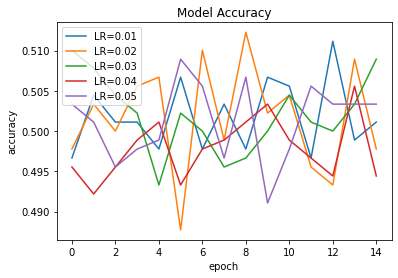

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

import os
import numpy as np
import matplotlib.pyplot as plt

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

train_image_generator = ImageDataGenerator(rescale=1./255,brightness_range=[0.5,1.5]) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255,brightness_range=[0.5,1.5]) # Generator for our validation data

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

lr=0.01

for i in range(5):

    adam = Adam(lr)

    print("Model using learning rate of",lr)

    lr = lr + 0.01

    model.compile(optimizer=adam, 
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

    history = model.fit_generator(
              train_data_gen,
              steps_per_epoch=total_train // batch_size,
              epochs=epochs,
              validation_data=val_data_gen,
              validation_steps=total_val // batch_size)
    
    plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['LR=0.01', 'LR=0.02', 'LR=0.03', 'LR=0.04', 'LR=0.05'], loc='upper left')
plt.show()

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

import os
import numpy as np
import matplotlib.pyplot as plt

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

train_image_generator = ImageDataGenerator(rescale=1./255,brightness_range=[0.5,1.5]) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255,brightness_range=[0.5,1.5]) # Generator for our validation data

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

for i in range(7):

    print("Model using",optimizer[i],"optimizer")

    model.compile(optimizer=optimizer[i], 
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

    history = model.fit_generator(
              train_data_gen,
              steps_per_epoch=total_train // batch_size,
              epochs=epochs,
              validation_data=val_data_gen,
              validation_steps=total_val // batch_size)
    
    plt.plot(history.history['val_accuracy'])

plt.title('Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'], loc='upper left')
plt.show()

NameError: ignored

# Visualizing the Conv3D and Conv2D Kernel
https://stackoverflow.com/questions/60456336/weight-visualization-of-3d-convolutional-kernel

Interesting Read that helps in visualizing the image after every layer - https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

Params of a layer -
“(n* m * l+1)*k”
- The filter size is “n*m”.
- “l” feature maps as the input 
- “k” feature maps as output


## Conv3D Visualization

In [0]:
# (1) Importing dependency
%tensorflow_version 1.x
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Conv3D
from keras.layers.normalization import BatchNormalization
import numpy as np

np.random.seed(1000)
    
# (2) Get Data
import tflearn.datasets.oxflower17 as oxflower17
x, y = oxflower17.load_data(one_hot=True)
x = np.expand_dims(x,-1)
    
# (3) Create a sequential model
model = Sequential()
    
# 1st Convolutional Layer
model.add(Conv3D(filters=2, input_shape=(224,224,3,1), kernel_size=(3,3,3), strides=(4,4,4), padding='Same'))
model.add(Activation('relu'))
    
# 2nd Convolutional Layer
model.add(Conv3D(filters=4, kernel_size=(4,4,4), strides=(1,1,1), padding='Same'))
model.add(Activation('relu'))
    
# 3rd Convolutional Layer
model.add(Conv3D(filters=2, kernel_size=(4,4,4), strides=(1,1,1), padding='Same'))
model.add(Activation('relu'))

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(100))
model.add(Activation('relu'))

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

# (4) Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(x, y, batch_size=64, epochs= 4, verbose=1, validation_split=0.2, shuffle=True)

TensorFlow is already loaded. Please restart the runtime to change versions.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_4 (Conv3D)            (None, 56, 56, 1, 2)      56        
_________________________________________________________________
activation_11 (Activation)   (None, 56, 56, 1, 2)      0         
_________________________________________________________________
conv3d_5 (Conv3D)            (None, 56, 56, 1, 4)      516       
_________________________________________________________________
activation_12 (Activation)   (None, 56, 56, 1, 4)      0         
_________________________________________________________________
conv3d_6 (Conv3D)            (None, 56, 56, 1, 2)      514       
_________________________________________________________________
activation_13 (Activation)   (None, 56, 56, 1, 2)      0         
___________________________________________

In [0]:
import numpy as np
x = model.layers[4].kernel

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(x))

In [0]:
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' in layer.name:
	  # get filter weights
	  filters, biases = layer.get_weights()
	  print(layer.name, filters.shape)
	 
#print(biases)

conv3d_4 (3, 3, 3, 1, 2)
conv3d_5 (4, 4, 4, 2, 4)
conv3d_6 (4, 4, 4, 4, 2)


### To print Color Image

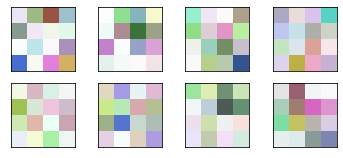

In [0]:
from matplotlib import pyplot

# # summarize filter shapes
# for layer in model.layers:
# 	# check for convolutional layer
# 	if 'conv' in layer.name:
# 	  # get filter weights
# 	  filters, biases = layer.get_weights()
   
# retrieve weights from the second hidden layer
filters, biases = model.layers[4].get_weights()

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
# n_filters = outgoing channels
outgoing_channels = 2
n_filters, ix = outgoing_channels, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, :, i]
	# plot each channel separately
	# Range of incoming channels
	incoming_channels = 4
	for j in range(incoming_channels):
			# specify subplot and turn of axis
			ax = pyplot.subplot(3, incoming_channels, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(f[:, :, :,j], cmap='gray')
			ix += 1
# show the figure
pyplot.show()

### To print Gray scale image

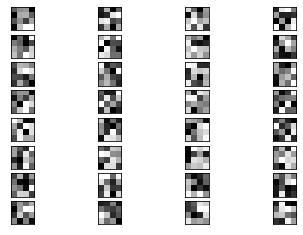

In [0]:
from matplotlib import pyplot

# # summarize filter shapes
# for layer in model.layers:
# 	# check for convolutional layer
# 	if 'conv' in layer.name:
# 	  # get filter weights
# 	  filters, biases = layer.get_weights()
   
# retrieve weights from the second hidden layer
filters, biases = model.layers[4].get_weights()

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
# n_filters = outgoing channels
outgoing_channels = 2
n_filters, ix = outgoing_channels, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, :, i]
	# plot each channel separately
	# Range of incoming channels
	incoming_channels = 4
	for j in range(incoming_channels):
		# Range of Depth of the kernel .i.e. 3
		Depth = 4
		for k in range(Depth):
			# specify subplot and turn of axis
			ax = pyplot.subplot((outgoing_channels*Depth), incoming_channels, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(f[:, :, k,j], cmap='gray')
			ix += 1
# show the figure
pyplot.show()

## Conv2D Visualization

In [0]:
# (1) Importing dependency
%tensorflow_version 1.x
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Conv3D
from keras.layers.normalization import BatchNormalization
import numpy as np

np.random.seed(1000)
    
# (2) Get Data
import tflearn.datasets.oxflower17 as oxflower17
x, y = oxflower17.load_data(one_hot=True)
    
# (3) Create a sequential model
model = Sequential()
    
# 1st Convolutional Layer
model.add(Conv2D(filters=2, input_shape=(224,224,3), kernel_size=(3,3), strides=(4,4), padding='Same'))
model.add(Activation('relu'))
    
# 2nd Convolutional Layer
model.add(Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='Same'))
model.add(Activation('relu'))
    
# 3rd Convolutional Layer
model.add(Conv2D(filters=2, kernel_size=(3,3), strides=(1,1), padding='Same'))
model.add(Activation('relu'))

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(100))
model.add(Activation('relu'))

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

# (4) Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epoch_gradient = []

def get_gradient_func(model):
    grads = K.gradients(model.total_loss, model.trainable_weights)
    inputs = model.model._feed_inputs + model.model._feed_targets + model.model._feed_sample_weights
    func = K.function(inputs, grads)
    return func

# Define the Required Callback Function
class GradientCalcCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
      get_gradient = get_gradient_func(model)
      grads = get_gradient([x, y, np.ones(len(y))])
      epoch_gradient.append(grads)
    
epoch = 4

model.fit(x, y, batch_size=64, epochs= epoch, verbose=1, validation_split=0.2, shuffle=True, callbacks=[GradientCalcCallback()])
    
# (7) Convert to a 2 dimensiaonal array of (epoch, gradients) type
gradient = np.asarray(epoch_gradient)
print("Total number of epochs run:", epoch)
print("Gradient Array has the shape:",gradient.shape)

TensorFlow 1.x selected.


Using TensorFlow backend.


100.0% 60276736 / 60270631


('Succesfully downloaded', '17flowers.tgz', 60270631, 'bytes.')
File Extracted
Starting to parse images...
Parsing Done!



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 56, 56, 2)         56        
_________________________________________________________________
activation_1 (Activation)    (None, 56, 56, 2)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 4)         76        
_________________________________________________________________
activation_2 (Activation)    (None, 56, 56, 4)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 2)         74        
_________________________________________________________________
activation_3 (Activation)    (None, 56, 56, 2)         0      

/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py:111: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


Epoch 2/4
1088/1088 [==============================] - 1s 567us/step - loss: 2.7434 - acc: 0.2426 - val_loss: 2.7336 - val_acc: 0.1250


/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py:111: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


Epoch 3/4
1088/1088 [==============================] - 1s 579us/step - loss: 2.2730 - acc: 0.4384 - val_loss: 2.4033 - val_acc: 0.2794


/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py:111: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


Epoch 4/4
1088/1088 [==============================] - 1s 555us/step - loss: 1.3170 - acc: 0.6884 - val_loss: 2.2917 - val_acc: 0.2794


/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py:111: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


Total number of epochs run: 4
Gradient Array has the shape: (4, 10)


In [0]:
import numpy as np
x = model.layers[4].kernel
gr = tf.get_default_graph()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    conv1_kernel_val = gr.get_tensor_by_name('conv1/kernel:0').eval()
    print(sess.run(x))

[[[[-0.07628679  0.31725606]
   [-0.29280648  0.10707554]
   [-0.1409379  -0.14117424]
   [-0.04934797 -0.17769067]]

  [[-0.22811215  0.2088342 ]
   [ 0.12845007 -0.10234594]
   [ 0.29518536  0.22939327]
   [-0.102254   -0.16633217]]

  [[ 0.23566589  0.06252447]
   [ 0.12485743 -0.2845057 ]
   [ 0.17910227 -0.09911792]
   [ 0.09142479 -0.17152238]]]


 [[[-0.23811015 -0.16541886]
   [-0.33333215 -0.13665256]
   [ 0.09643212  0.07662854]
   [ 0.05305314 -0.23696613]]

  [[ 0.0339109   0.16784325]
   [-0.04169551 -0.0482665 ]
   [ 0.08657351  0.12973014]
   [ 0.05880824  0.05947757]]

  [[ 0.11017862 -0.14729127]
   [ 0.2464253  -0.19549426]
   [-0.2609269   0.25060275]
   [-0.26333413 -0.13276713]]]


 [[[-0.06246376  0.0363799 ]
   [-0.02949128  0.32878068]
   [ 0.15073076 -0.30452785]
   [-0.24252614 -0.09735529]]

  [[ 0.23945466  0.01562142]
   [ 0.22383246  0.09923801]
   [-0.2536789  -0.09304142]
   [-0.22144732  0.3057051 ]]

  [[ 0.05687061 -0.2811746 ]
   [-0.2436115  -0.1616

In [0]:
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' in layer.name:
	  # get filter weights
	  filters, biases = layer.get_weights()
	  print(layer.name, filters.shape)
	 
#print(filters[:,:,:,0])

conv2d_4 (3, 3, 3, 2)
conv2d_5 (3, 3, 2, 4)
conv2d_6 (3, 3, 4, 2)


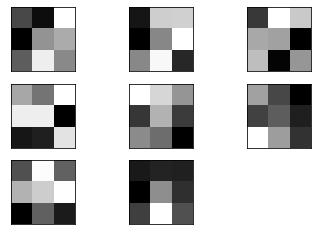

In [0]:
from matplotlib import pyplot

# # summarize filter shapes
# for layer in model.layers:
# 	# check for convolutional layer
# 	if 'conv' in layer.name:
# 	  # get filter weights
# 	  filters, biases = layer.get_weights()
   
# retrieve weights from the second hidden layer
filters, biases = model.layers[4].get_weights()

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
# n_filters = outgoing filters
n_filters, ix = 2, 1 
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	#print(f)
	# plot each channel separately
	# Range of incoming filters
	for j in range(4):
		# specify subplot and turn of axis
		ax = pyplot.subplot(3, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
	  #print(f[:, :, j])
		ix += 1
# show the figure
pyplot.show()

# Tensorflow Reduce_max
https://stackoverflow.com/questions/60277848/tensorflow-reduce-max-for-different-dimensions

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

# Create a Ragged Tensor of variable length
rt = tf.ragged.constant([[9, 8, 7], [], [6, 5], [4]])
print("Ragged Tensor:","\n",rt,"\n")

# Convert to Tensor to have same length
rt = rt.to_tensor()
print("Tensor of same length:","\n",rt,"\n")

# Apply reduce_max to get the max value along axis=1
rt = tf.reduce_max(rt, axis=1)
print("Reduce Max Tensor:","\n",rt,"\n")

Ragged Tensor: 
 <tf.RaggedTensor [[9, 8, 7], [], [6, 5], [4]]> 

Tensor of same length: 
 tf.Tensor(
[[9 8 7]
 [0 0 0]
 [6 5 0]
 [4 0 0]], shape=(4, 3), dtype=int32) 

Reduce Max Tensor: 
 tf.Tensor([9 0 6 4], shape=(4,), dtype=int32) 



# Save and Load Model
https://stackoverflow.com/questions/60198878/proper-way-to-save-model-in-keras

Good Article for Load and Save in Keras - https://machinelearningmastery.com/save-load-keras-deep-learning-models/

## Build and Save the Model

In [0]:
# MLP for Pima Indians Dataset saved to single file
import numpy as np
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

# load pima indians dataset
dataset = np.loadtxt("/content/pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# define model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Summary
model.summary()

# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)

# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# save model and architecture to single file
model.save("model.h5")
print("Saved model to disk")

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
acc: 77.08%
Saved model to disk


## Load the Model

In [0]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('model.h5')

# summarize model.
model.summary()

# load dataset
dataset = loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# evaluate the model
score = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
acc: 77.08%


# Feed Dict Example


In [0]:
%tensorflow_version 1.x
import tensorflow as tf

x = tf.placeholder(tf.float32)
y = x * 42

with tf.Session() as sess:
  train_accuracy = y.eval(session=sess,feed_dict={x: (2, 4)})
  print(train_accuracy)

[ 84. 168.]


# Dealing with Session Error Explained
https://stackoverflow.com/questions/61006702/cannot-use-the-given-session-to-evaluate-tensor-the-tensors-graph-is-different

## Simple Error and Fix 

In [0]:
%tensorflow_version 1.x
import tensorflow as tf

g = tf.Graph()
with g.as_default():
  x = tf.constant(1.0)  # x is created in graph g

s = tf.Session(graph=g)
with s.as_default() as sess:
  print(x.eval()) # x was created in graph g and it is evaluated in session s
                  # which is tied to graph g, so everything is ok.
  y = tf.constant(2.0) # y is created in TensorFlow's default graph!!!
  print(y.eval()) # y was created in TF's default graph, but it is evaluated in
                  # session s which is tied to graph g => ERROR

1.0


ValueError: ignored

In [0]:
%tensorflow_version 1.x
import tensorflow as tf

g = tf.Graph()
with g.as_default():
  x = tf.constant(1.0)  # x is created in graph g
  y = tf.constant(2.0) # y is created in graph g

s = tf.Session(graph=g)
with s.as_default() as sess:
  print(x.eval()) # x was created in graph g and it is evaluated in session s
                         # which is tied to graph g, so everything is ok.
  print(y.eval()) # y was created in graph g and it is evaluated in session s
                         # which is tied to graph g, so everything is ok.

1.0
2.0


## Error and Fix Explained in Detail

### Error with default session and using variable created in another graph

In [0]:
%tensorflow_version 1.x
import tensorflow as tf

g = tf.Graph()
with g.as_default():
  x = tf.constant(1.0)  # x is created in graph g

with tf.Session().as_default() as sess:
  y = tf.constant(2.0) # y is created in TensorFlow's default graph!!!
  print(y.eval(session=sess)) # y was created in TF's default graph, and is evaluated in
                  # default session, so everything is ok.  
  print(x.eval(session=sess)) # x was created in graph g and it is evaluated in session s
                  # which is tied to graph g, but it is evaluated in
                  # session s which is tied to graph g => ERROR

2.0


ValueError: ignored

### Error with graph session as default and using variable created in default graph

In [0]:
%tensorflow_version 1.x
import tensorflow as tf

g = tf.Graph()
with g.as_default():
  x = tf.constant(1.0)  # x is created in graph g

with tf.Session(graph=g).as_default() as sess:
  print(x.eval(session=sess)) # x was created in graph g and it is evaluated in session s
                         # which is tied to graph g, so everything is ok.
  y = tf.constant(2.0) # y is created in TensorFlow's default graph!!!
  print(y.eval()) # y was created in TF's default graph, but it is evaluated in
                  # session s which is tied to graph g => ERROR

1.0


ValueError: ignored

### Error with graph session as default and using variable created in default graph and also session=sess

In [0]:
%tensorflow_version 1.x
import tensorflow as tf

g = tf.Graph()
with g.as_default():
  x = tf.constant(1.0)  # x is created in graph g

with tf.Session(graph=g).as_default() as sess:
  print(x.eval(session=sess)) # x was created in graph g and it is evaluated in session s
                         # which is tied to graph g, so everything is ok.
  y = tf.constant(2.0) # y is created in TensorFlow's default graph!!!
  print(y.eval(session=sess)) # y was created in TF's default graph, but it is evaluated in
                  # session s which is tied to graph g => ERROR

1.0


ValueError: ignored

### Fix with default session and variable not assigned to any graph

In [0]:
%tensorflow_version 1.x
import tensorflow as tf

x = tf.constant(1.0)  # x is in not assigned to any graph

with tf.Session().as_default() as sess:
  y = tf.constant(2.0) # y is created in TensorFlow's default graph!!!
  print(y.eval(session=sess)) # y was created in TF's default graph, and is evaluated in
                  # default session, so everything is ok.  
  print(x.eval(session=sess)) # x not assigned to any graph, and is evaluated in
                  # default session, so everything is ok.  

2.0
1.0


### The best fix is to cleanly separate the construction phase and the execution phase

In [0]:
import tensorflow as tf

g = tf.Graph()
with g.as_default():
  x = tf.constant(1.0)  # x is created in graph g
  y = tf.constant(2.0) # y is created in graph g

with tf.Session(graph=g).as_default() as sess:
  print(x.eval()) # x was created in graph g and it is evaluated in session s
                         # which is tied to graph g, so everything is ok.
  print(y.eval()) # y was created in graph g and it is evaluated in session s
                         # which is tied to graph g, so everything is ok.

1.0
2.0


# softmax and log_softmax


In [0]:
%tensorflow_version 1.x
import tensorflow as tf
x = tf.nn.softmax([0.12345,0.3256,0.2356,-0.3256,0.13562])
y = -tf.nn.log_softmax([0.12345,0.3256,0.2356,-0.3256,0.13562])

with tf.Session() as sess:
   print(x.eval())
   print(y.eval())

[0.20027274 0.24514017 0.22404124 0.12782091 0.20272495]
[1.6080751 1.4059252 1.4959252 2.057125  1.5959052]


# Tensor to array
https://stackoverflow.com/questions/59875172/typeerror-when-trying-to-use-earlystopping-with-f1-metric-as-stopping-criterion

In [0]:
%tensorflow_version 1.x
print(tf.__version__)
import tensorflow as tf
import numpy as np

x = tf.constant([1,2,3,4,5,6])
print("Type of x:",x)

with tf.Session() as sess:
  y = np.array(x.eval())
  print("Type of y:",y.shape,y)

1.15.2
Type of x: Tensor("Const_24:0", shape=(6,), dtype=int32)
Type of y: (6,) [1 2 3 4 5 6]


# Fit_generator simple example
https://stackoverflow.com/questions/59417210/keras-losing-axis-with-brightness-range-during-image-augmentation

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

import os
import numpy as np
import matplotlib.pyplot as plt

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

train_image_generator = ImageDataGenerator(rescale=1./255,brightness_range=[0.5,1.5]) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255,brightness_range=[0.5,1.5]) # Generator for our validation data

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

model.compile(optimizer="adam", 
          loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
          metrics=['accuracy'])

history = model.fit_generator(
          train_data_gen,
          steps_per_epoch=total_train // batch_size,
          epochs=epochs,
          validation_data=val_data_gen,
          validation_steps=total_val // batch_size)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
15/15 [==============================] - 9s 591ms/step - loss: 1.0527 - accuracy: 0.5010 - val_loss: 0.6918 - val_accuracy: 0.5089
Epoch 2/15
15/15 [==============================] - 9s 609ms/step - loss: 0.6790 - accuracy: 0.5337 - val_loss: 0.6473 - val_accuracy: 0.5647
Epoch 3/15
15/15 [==============================] - 9s 610ms/step - loss: 0.6340 - accuracy: 0.5983 - val_loss: 0.6208 - val_accuracy: 0.6172
Epoch 4/15
15/15 [==============================] - 9s 609ms/step - loss: 0.5899 - accuracy: 0.6464 - val_loss: 0.5938 - val_accuracy: 0.6585
Epoch 5/15
15/15 [==============================] - 9s 599ms/step - loss: 0.5182 - accuracy: 0.7286 - val_loss: 0.6165 - val_accuracy: 0.7042
Epoch 6/15
15/15 [==============================] - 9s 608ms/step - loss: 0.4697 - accuracy: 0.7682 - val_loss: 0.5853 - val_accur

# Convert Functional Model to Sequential and Vice Versa
https://stackoverflow.com/questions/61130836/convert-functional-model-to-sequential-keras

## User Code has one functional model and another sequential model

In [0]:
import tensorflow as tf
from tensorflow.python.keras import layers, models, applications, Input, Model
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, UpSampling2D

#load in data using imagedatagenreator
input_img = Input(shape=(128, 128,3))

x = Convolution2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Convolution2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Convolution2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (8, 4, 4) i.e. 128-dimensional
x = Convolution2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Convolution2D(3, (3, 3), activation='sigmoid', padding='same')(x)

#compile and run

##save weights and and model start conv network with these weights
encoder = Model(input_img, encoded)
encoder.save('Encoded.h5')

In [13]:
import tensorflow as tf
from tensorflow.python.keras import layers, models, applications, Input, Model, Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, UpSampling2D, Conv2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import load_model

#load in data using imagedatagenreator
model = load_model('Encoded.h5')
model.summary()

model = Sequential()
model.add(Conv2D(64,(3,3), input_shape=(424,424,3), activation='relu'))#3x3 is default
model.add(MaxPooling2D(pool_size=(3,3)))
#model.add(Dropout(.1))#test
model.add(Dense(32, activation='relu'))#test
model.add(Conv2D(64,(3,3), activation='relu'))#input_shape=(424,424,3)
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.3))#test
model.add(Conv2D(64,(3,3), activation='relu'))#input_shape=(424,424,3)
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(.3))
model.add(Flatten(input_shape=(424,424,3)))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 8)         1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 8)         584       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 8)         0     

## Convert functional model to sequential model

In [27]:
import tensorflow as tf
from tensorflow.python.keras import layers, models, applications, Input, Model
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, UpSampling2D

# Create the Sequential Model
model = Sequential()
model.add(Convolution2D(16, (3, 3), input_shape=(424,424,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Convolution2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Convolution2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

# Model summary
model.summary()

# Save the Model and Architecture
model.save('Encoded.h5')

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 424, 424, 16)      448       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 212, 212, 16)      0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 212, 212, 8)       1160      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 106, 106, 8)       0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 106, 106, 8)       584       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 53, 53, 8)         0         
Total params: 2,192
Trainable params: 2,192
Non-trainable params: 0
____________________________________________________

In [28]:
import tensorflow as tf
from tensorflow.python.keras import layers, models, applications, Input, Model, Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, UpSampling2D, Conv2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import load_model

# Load the previoulsy saved enocdermodel 
model = load_model('Encoded.h5')

# Add the additonal layers 
model.add(Conv2D(64,(3,3), activation='relu'))#3x3 is default
model.add(MaxPooling2D(pool_size=(3,3)))
#model.add(Dropout(.1))#test
model.add(Dense(32, activation='relu'))#test
model.add(Conv2D(64,(3,3), activation='relu'))#input_shape=(424,424,3)
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.3))#test
model.add(Conv2D(64,(3,3), activation='relu'))#input_shape=(424,424,3)
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(.3))
model.add(Flatten(input_shape=(424,424,3)))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))

# Model summary 
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 424, 424, 16)      448       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 212, 212, 16)      0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 212, 212, 8)       1160      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 106, 106, 8)       0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 106, 106, 8)       584       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 53, 53, 8)         0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 51, 51, 64)       

## Convert sequential model to functional model

In [29]:
import tensorflow as tf
from tensorflow.python.keras import layers, models, applications, Input, Model
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, UpSampling2D

#load in data using imagedatagenreator
input_img = Input(shape=(424,424,3))

x = Convolution2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Convolution2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Convolution2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

##save weights and and model start conv network with these weights
encoder = Model(input_img, encoded)

# Model Summary
encoder.summary()

encoder.save('Encoded.h5')

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 424, 424, 3)]     0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 424, 424, 16)      448       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 212, 212, 16)      0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 212, 212, 8)       1160      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 106, 106, 8)       0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 106, 106, 8)       584       
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 53, 53, 8)         0   

In [26]:
import tensorflow as tf
from tensorflow.python.keras import layers, models, applications, Input, Model, Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, UpSampling2D, Conv2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import load_model

# Load the previoulsy saved enocdermodel 
load_model('Encoded.h5')

# Add the additonal layers 
x = Convolution2D(64,(3,3), activation='relu')(encoded)#3x3 is default
x = MaxPooling2D(pool_size=(3,3))(x)
#model.add(Dropout(.1))#test
x = Dense(32, activation='relu')(x)#test
x = Conv2D(64,(3,3), activation='relu')(x)#input_shape=(424,424,3)
x = MaxPooling2D(pool_size=(3,3))(x)
x = Dense(64, activation='relu')(x)
x = Dropout(.3)(x)#test
x = Conv2D(64,(3,3), activation='relu')(x)#input_shape=(424,424,3)
x = MaxPooling2D(pool_size=(3,3))(x)
x = Dropout(.3)(x)
x = Flatten(input_shape=(424,424,3))(x)
x = BatchNormalization()(x)
output = Dense(2, activation='softmax')(x)

##save weights and and model start conv network with these weights
model = Model(input_img, output)

# Model summary 
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 424, 424, 3)]     0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 424, 424, 16)      448       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 212, 212, 16)      0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 212, 212, 8)       1160      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 106, 106, 8)       0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 106, 106, 8)       584       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 53, 53, 8)         0   